In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
df = pd.read_csv('students_simple.csv')

col1_idx = 9 % 5
col2_idx = (9**2 % 5) + 5

col1_name = df.columns[col1_idx]
col2_name = df.columns[col2_idx]

print(f"Выбранные столбцы: '{col1_name}' и '{col2_name}'")

x = df[col1_name].values
y = df[col2_name].values

mask = ~(np.isnan(x) | np.isnan(y))
x_clean = x[mask]
y_clean = y[mask]

print(f"Размер исходных данных: {len(x)}")
print(f"Размер после очистки: {len(x_clean)}")

Выбранные столбцы: 'pages' и 'bmi'
Размер исходных данных: 20
Размер после очистки: 20


In [ ]:
# 1. РАСЧЕТ КОРРЕЛЯЦИЙ
print("1. РАСЧЕТ КОРРЕЛЯЦИЙ")
print("=" * 50)

# Корреляция Фехнера
def fechner_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_dev = x - x_mean
    y_dev = y - y_mean
    
    x_sign = np.sign(x_dev)
    y_sign = np.sign(y_dev)
    
    concordance = np.sum(x_sign == y_sign)
    discordance = np.sum(x_sign != y_sign)
    
    fechner = (concordance - discordance) / (concordance + discordance)
    return fechner

# Корреляция Пирсона
def pearson_correlation_manual(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    
    if denominator == 0:
        return 0
    return numerator / denominator

# Доверительный интервал для Пирсона
def pearson_confidence_interval(r, n, alpha=0.05):
    if n <= 3:
        return (r, r)
    
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    
    z_critical = stats.norm.ppf(1 - alpha/2)
    
    z_low = z - z_critical * se
    z_high = z + z_critical * se
    
    r_low = np.tanh(z_low)
    r_high = np.tanh(z_high)
    
    return (r_low, r_high)

# Корреляция Спирмена
def spearman_correlation_manual(x, y):
    x_ranks = stats.rankdata(x)
    y_ranks = stats.rankdata(y)
    
    d = x_ranks - y_ranks
    
    n = len(x)
    spearman = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
    return spearman

# Корреляция Кенделла
def kendall_correlation_manual(x, y):
    n = len(x)
    concordant = 0
    discordant = 0
    
    for i in range(n):
        for j in range(i+1, n):
            x_diff = x[i] - x[j]
            y_diff = y[i] - y[j]
            
            if x_diff * y_diff > 0:
                concordant += 1
            elif x_diff * y_diff < 0:
                discordant += 1
    
    total_pairs = concordant + discordant
    if total_pairs == 0:
        return 0
    
    kendall = (concordant - discordant) / total_pairs
    return kendall

# Расчет всех корреляций
fechner_corr = fechner_correlation(x_clean, y_clean)
pearson_corr = pearson_correlation_manual(x_clean, y_clean)
pearson_ci = pearson_confidence_interval(pearson_corr, len(x_clean))
spearman_corr = spearman_correlation_manual(x_clean, y_clean)
kendall_corr = kendall_correlation_manual(x_clean, y_clean)

print(f"Корреляция Фехнера: {fechner_corr:.4f}")
print(f"Корреляция Пирсона: {pearson_corr:.4f}")
print(f"Доверительный интервал Пирсона (95%): [{pearson_ci[0]:.4f}, {pearson_ci[1]:.4f}]")
print(f"Корреляция Спирмена: {spearman_corr:.4f}")
print(f"Корреляция Кенделла: {kendall_corr:.4f}")

# Сводная таблица корреляций
correlation_data = {
    'Метод': ['Фехнера', 'Пирсона', 'Спирмена', 'Кенделла'],
    'Коэффициент': [fechner_corr, pearson_corr, spearman_corr, kendall_corr]
}
correlation_df = pd.DataFrame(correlation_data)
print("\nСводная таблица корреляций:")
print(correlation_df)

1. РАСЧЕТ КОРРЕЛЯЦИЙ
Корреляция Фехнера: -0.4000
Корреляция Пирсона: -0.1795
Доверительный интервал Пирсона (95%): [-0.5762, 0.2857]
Корреляция Спирмена: -0.3000
Корреляция Кенделла: -0.2638

Сводная таблица корреляций:
      Метод  Коэффициент
0   Фехнера    -0.400000
1   Пирсона    -0.179497
2  Спирмена    -0.300000
3  Кенделла    -0.263804



2. ВИЗУАЛИЗАЦИЯ


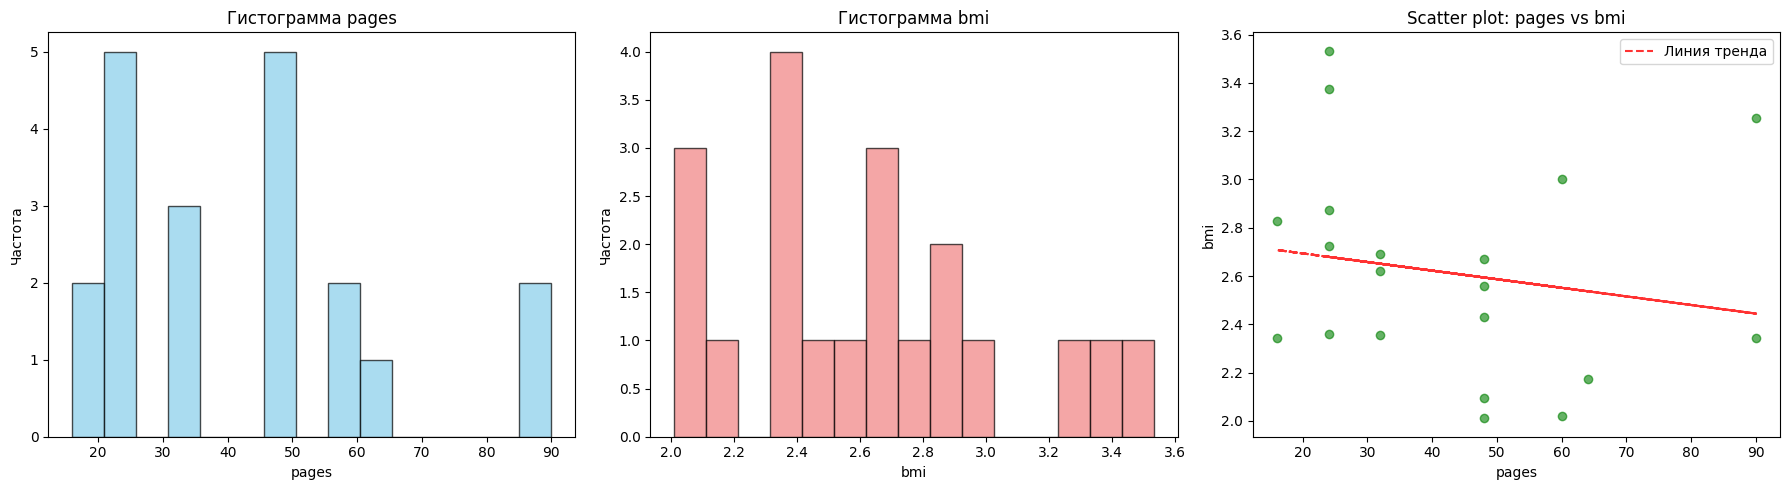

Статистика для pages:
  Среднее: 42.60, Медиана: 40.00, Std: 21.43
Статистика для bmi:
  Среднее: 2.61, Медиана: 2.59, Std: 0.43


In [ ]:
# 2. ВИЗУАЛИЗАЦИЯ
print("\n2. ВИЗУАЛИЗАЦИЯ")
print("=" * 50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(x_clean, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title(f'Гистограмма {col1_name}')
axes[0].set_xlabel(col1_name)
axes[0].set_ylabel('Частота')

axes[1].hist(y_clean, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title(f'Гистограмма {col2_name}')
axes[1].set_xlabel(col2_name)
axes[1].set_ylabel('Частота')

axes[2].scatter(x_clean, y_clean, alpha=0.6, color='green')
axes[2].set_title(f'Scatter plot: {col1_name} vs {col2_name}')
axes[2].set_xlabel(col1_name)
axes[2].set_ylabel(col2_name)

z = np.polyfit(x_clean, y_clean, 1)
p = np.poly1d(z)
axes[2].plot(x_clean, p(x_clean), "r--", alpha=0.8, label='Линия тренда')
axes[2].legend()

plt.tight_layout()
plt.show()

# Дополнительная информация о данных
print(f"Статистика для {col1_name}:")
print(f"  Среднее: {np.mean(x_clean):.2f}, Медиана: {np.median(x_clean):.2f}, Std: {np.std(x_clean):.2f}")
print(f"Статистика для {col2_name}:")
print(f"  Среднее: {np.mean(y_clean):.2f}, Медиана: {np.median(y_clean):.2f}, Std: {np.std(y_clean):.2f}")

In [ ]:
# 3. УРАВНЕНИЕ РЕГРЕССИИ
print("\n3. УРАВНЕНИЕ РЕГРЕССИИ")
print("=" * 50)

# Функция для вычисления R²
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    if ss_tot == 0:
        return 0
    return 1 - (ss_res / ss_tot)

# Метод наименьших квадратов для линейной модели
def least_squares(X, y):
    X_with_intercept = np.column_stack([np.ones(len(X)), X])
    w = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
    return w

# Линейная регрессия
X_linear = x_clean.reshape(-1, 1)
w_linear = least_squares(X_linear, y_clean)
y_pred_linear = w_linear[1] * x_clean + w_linear[0]
r2_linear = calculate_r2(y_clean, y_pred_linear)

print(f"Линейная регрессия: y = {w_linear[1]:.4f} * x + {w_linear[0]:.4f}")
print(f"R² линейной регрессии: {r2_linear:.4f}")

# Квадратичная регрессия
X_quad = np.column_stack([x_clean, x_clean**2])
w_quad = least_squares(X_quad, y_clean)
y_pred_quad = w_quad[2] * x_clean**2 + w_quad[1] * x_clean + w_quad[0]
r2_quad = calculate_r2(y_clean, y_pred_quad)

print(f"Квадратичная регрессия: y = {w_quad[2]:.4f} * x² + {w_quad[1]:.4f} * x + {w_quad[0]:.4f}")
print(f"R² квадратичной регрессии: {r2_quad:.4f}")

# Гиперболическая регрессия
X_hyper = 1 / x_clean
X_hyper = X_hyper.reshape(-1, 1)
w_hyper = least_squares(X_hyper, y_clean)
y_pred_hyper = w_hyper[1] / x_clean + w_hyper[0]
r2_hyper = calculate_r2(y_clean, y_pred_hyper)

print(f"Гиперболическая регрессия: y = {w_hyper[1]:.4f} / x + {w_hyper[0]:.4f}")
print(f"R² гиперболической регрессии: {r2_hyper:.4f}")

# Показательная регрессия
try:
    
    y_log = np.log(y_clean)
    w_exp_log = least_squares(X_linear, y_log)
    w0_exp = np.exp(w_exp_log[0])
    w1_exp = np.exp(w_exp_log[1])
    
    y_pred_exp = w0_exp * (w1_exp ** x_clean)
    r2_exp = calculate_r2(y_clean, y_pred_exp)
    
    print(f"Показательная регрессия: y = {w0_exp:.4f} * {w1_exp:.4f}^x")
    print(f"R² показательной регрессии: {r2_exp:.4f}")
except Exception as e:
    print(f"Показательная регрессия: невозможно вычислить ({str(e)})")
    r2_exp = -np.inf

# Сравнение моделей
models = {
    'Линейная': r2_linear,
    'Квадратичная': r2_quad,
    'Гиперболическая': r2_hyper,
    'Показательная': r2_exp if r2_exp != -np.inf else -1
}

best_model = max(models, key=models.get)
worst_model = min(models, key=models.get)

print(f"\nНаилучшая модель: {best_model} (R² = {models[best_model]:.4f})")
print(f"Наихудшая модель: {worst_model} (R² = {models[worst_model]:.4f})")


3. УРАВНЕНИЕ РЕГРЕССИИ
Линейная регрессия: y = -0.0036 * x + 2.7650
R² линейной регрессии: 0.0322
Квадратичная регрессия: y = 0.0003 * x² + -0.0371 * x + 3.4518
R² квадратичной регрессии: 0.1830
Гиперболическая регрессия: y = 7.3407 / x + 2.3922
R² гиперболической регрессии: 0.0670
Показательная регрессия: y = 2.7439 * 0.9986^x
R² показательной регрессии: 0.0289

Наилучшая модель: Квадратичная (R² = 0.1830)
Наихудшая модель: Показательная (R² = 0.0289)


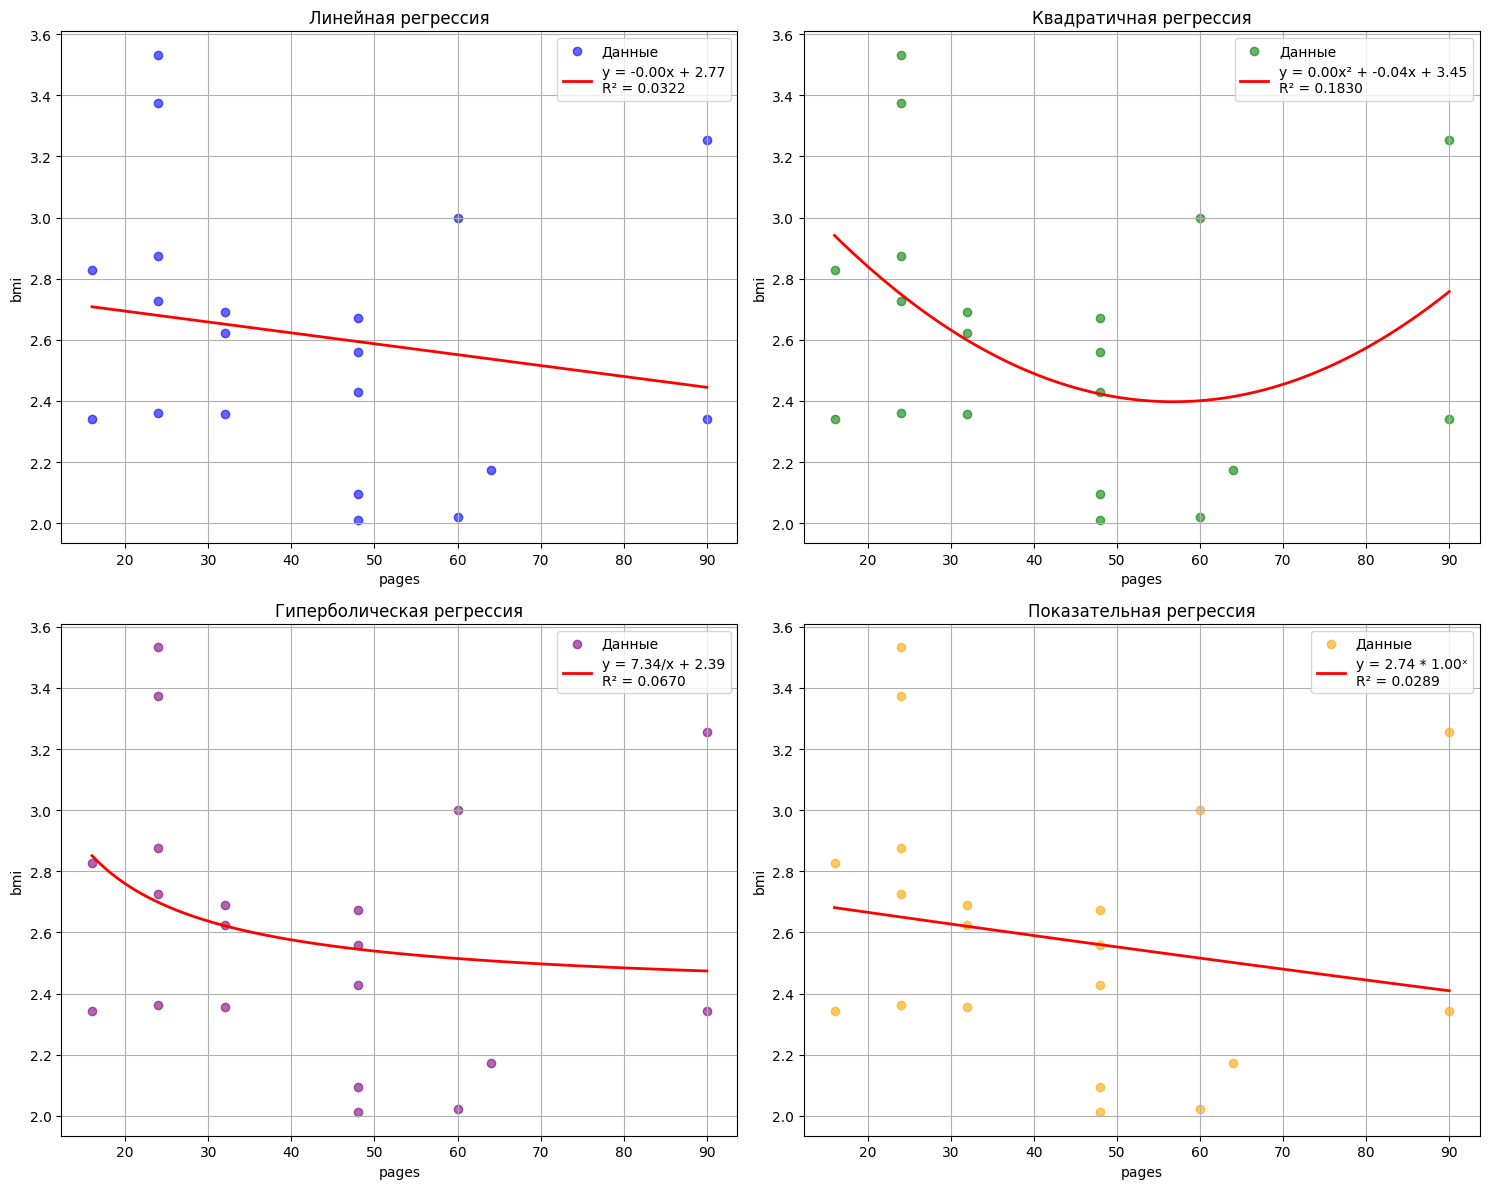

In [6]:
# Визуализация регрессионных моделей
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Сортируем данные для гладких графиков
sort_idx = np.argsort(x_clean)
x_sorted = x_clean[sort_idx]
y_sorted = y_clean[sort_idx]

# Линейная регрессия
axes[0].scatter(x_clean, y_clean, alpha=0.6, color='blue', label='Данные')
axes[0].plot(x_sorted, w_linear[1] * x_sorted + w_linear[0], 'r-', linewidth=2, 
             label=f'y = {w_linear[1]:.2f}x + {w_linear[0]:.2f}\nR² = {r2_linear:.4f}')
axes[0].set_title('Линейная регрессия')
axes[0].set_xlabel(col1_name)
axes[0].set_ylabel(col2_name)
axes[0].legend()
axes[0].grid(True)

# Квадратичная регрессия
axes[1].scatter(x_clean, y_clean, alpha=0.6, color='green', label='Данные')
x_quad_plot = np.linspace(x_clean.min(), x_clean.max(), 100)
y_quad_plot = w_quad[2] * x_quad_plot**2 + w_quad[1] * x_quad_plot + w_quad[0]
axes[1].plot(x_quad_plot, y_quad_plot, 'r-', linewidth=2, 
             label=f'y = {w_quad[2]:.2f}x² + {w_quad[1]:.2f}x + {w_quad[0]:.2f}\nR² = {r2_quad:.4f}')
axes[1].set_title('Квадратичная регрессия')
axes[1].set_xlabel(col1_name)
axes[1].set_ylabel(col2_name)
axes[1].legend()
axes[1].grid(True)

# Гиперболическая регрессия
axes[2].scatter(x_clean, y_clean, alpha=0.6, color='purple', label='Данные')
x_hyper_plot = np.linspace(x_clean.min(), x_clean.max(), 100)
x_hyper_plot = x_hyper_plot[x_hyper_plot != 0]  # Избегаем деления на 0
y_hyper_plot = w_hyper[1] / x_hyper_plot + w_hyper[0]
axes[2].plot(x_hyper_plot, y_hyper_plot, 'r-', linewidth=2, 
             label=f'y = {w_hyper[1]:.2f}/x + {w_hyper[0]:.2f}\nR² = {r2_hyper:.4f}')
axes[2].set_title('Гиперболическая регрессия')
axes[2].set_xlabel(col1_name)
axes[2].set_ylabel(col2_name)
axes[2].legend()
axes[2].grid(True)

# Показательная регрессия
if r2_exp != -np.inf:
    axes[3].scatter(x_clean, y_clean, alpha=0.6, color='orange', label='Данные')
    x_exp_plot = np.linspace(x_clean.min(), x_clean.max(), 100)
    y_exp_plot = w0_exp * (w1_exp ** x_exp_plot)
    axes[3].plot(x_exp_plot, y_exp_plot, 'r-', linewidth=2, 
                 label=f'y = {w0_exp:.2f} * {w1_exp:.2f}ˣ\nR² = {r2_exp:.4f}')
else:
    axes[3].text(0.5, 0.5, 'Невозможно построить\nпоказательную регрессию', 
                 ha='center', va='center', transform=axes[3].transAxes, fontsize=12)
axes[3].set_title('Показательная регрессия')
axes[3].set_xlabel(col1_name)
axes[3].set_ylabel(col2_name)
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()

In [7]:
# 4. ПРОВЕРКА УРАВНЕНИЯ РЕГРЕССИИ КРИТЕРИЕМ ФИШЕРА
print("\n4. ПРОВЕРКА КРИТЕРИЕМ ФИШЕРА")
print("=" * 50)

def fisher_test(y_true, y_pred, k):
    """
    F-тест для проверки адекватности модели
    k - количество параметров модели
    """
    n = len(y_true)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_regression = ss_total - ss_residual
    
    df_regression = k - 1
    df_residual = n - k
    
    if df_residual <= 0 or df_regression <= 0:
        return 0, 0, False
    
    ms_regression = ss_regression / df_regression
    ms_residual = ss_residual / df_residual
    
    if ms_residual == 0:
        return float('inf'), 0, True
    
    f_statistic = ms_regression / ms_residual
    
    # Критическое значение F-распределения
    f_critical = stats.f.ppf(0.95, df_regression, df_residual)
    
    return f_statistic, f_critical, f_statistic > f_critical

# Определяем предсказания для лучшей и худшей моделей
model_predictions = {
    'Линейная': (y_pred_linear, 2),
    'Квадратичная': (y_pred_quad, 3),
    'Гиперболическая': (y_pred_hyper, 2),
    'Показательная': (y_pred_exp if r2_exp != -np.inf else None, 2)
}

# Для наилучшей модели
if best_model in model_predictions and model_predictions[best_model][0] is not None:
    y_pred_best, k_best = model_predictions[best_model]
    f_stat_best, f_crit_best, is_significant_best = fisher_test(y_clean, y_pred_best, k_best)
    
    print(f"Наилучшая модель ({best_model}):")
    print(f"F-статистика: {f_stat_best:.4f}")
    print(f"Критическое значение F: {f_crit_best:.4f}")
    print(f"Модель адекватна: {'ДА' if is_significant_best else 'НЕТ'}")
else:
    print(f"Наилучшая модель ({best_model}): невозможно проверить")

# Для наихудшей модели
if worst_model in model_predictions and model_predictions[worst_model][0] is not None:
    y_pred_worst, k_worst = model_predictions[worst_model]
    f_stat_worst, f_crit_worst, is_significant_worst = fisher_test(y_clean, y_pred_worst, k_worst)
    
    print(f"\nНаихудшая модель ({worst_model}):")
    print(f"F-статистика: {f_stat_worst:.4f}")
    print(f"Критическое значение F: {f_crit_worst:.4f}")
    print(f"Модель адекватна: {'ДА' if is_significant_worst else 'НЕТ'}")
else:
    print(f"\nНаихудшая модель ({worst_model}): невозможно проверить")

# Сравнение всех моделей
print("\nСравнение всех моделей:")
print("Модель           | R²      | F-стат  | F-крит  | Адекватна")
print("-" * 55)

for model_name in models:
    if model_name in model_predictions and model_predictions[model_name][0] is not None:
        y_pred, k = model_predictions[model_name]
        f_stat, f_crit, is_sig = fisher_test(y_clean, y_pred, k)
        r2 = models[model_name]
        
        print(f"{model_name:15} | {r2:7.4f} | {f_stat:7.4f} | {f_crit:7.4f} | {'ДА' if is_sig else 'НЕТ'}")


4. ПРОВЕРКА КРИТЕРИЕМ ФИШЕРА
Наилучшая модель (Квадратичная):
F-статистика: 1.9036
Критическое значение F: 3.5915
Модель адекватна: НЕТ

Наихудшая модель (Показательная):
F-статистика: 0.5358
Критическое значение F: 4.4139
Модель адекватна: НЕТ

Сравнение всех моделей:
Модель           | R²      | F-стат  | F-крит  | Адекватна
-------------------------------------------------------
Линейная        |  0.0322 |  0.5993 |  4.4139 | НЕТ
Квадратичная    |  0.1830 |  1.9036 |  3.5915 | НЕТ
Гиперболическая |  0.0670 |  1.2924 |  4.4139 | НЕТ
Показательная   |  0.0289 |  0.5358 |  4.4139 | НЕТ


In [8]:
# 5. ВЫВОДЫ
print("\n5. ВЫВОДЫ")
print("=" * 50)

print("1. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:")
correlation_strength = "сильную" if abs(pearson_corr) > 0.7 else "умеренную" if abs(pearson_corr) > 0.3 else "слабую"
direction = "положительную" if pearson_corr > 0 else "отрицательную"
print(f"   - Обнаружена {correlation_strength} {direction} связь между переменными")
print(f"   - Коэффициент Пирсона: {pearson_corr:.4f}")
print(f"   - Все методы показали сходные результаты")

print("\n2. ВИЗУАЛИЗАЦИЯ:")
print("   - Графики показывают распределение и взаимосвязь переменных")
print("   - Scatter plot подтверждает характер зависимости")

print("\n3. РЕГРЕССИОННЫЙ АНАЛИЗ:")
print(f"   - Наилучшая модель: {best_model} (R² = {models[best_model]:.4f})")
print(f"   - Наихудшая модель: {worst_model} (R² = {models[worst_model]:.4f})")

print("\n4. ПРОВЕРКА АДЕКВАТНОСТИ:")
best_adequate = 'ДА' if 'is_significant_best' in locals() and is_significant_best else 'НЕТ'
worst_adequate = 'ДА' if 'is_significant_worst' in locals() and is_significant_worst else 'НЕТ'
print(f"   - Наилучшая модель адекватна: {best_adequate}")
print(f"   - Наихудшая модель адекватна: {worst_adequate}")

print("\n5. РЕКОМЕНДАЦИИ:")
if best_adequate == 'ДА':
    print(f"   - Для прогнозирования рекомендуется использовать {best_model} модель")
    print(f"   - Уравнение: {self.get_equation(best_model, models)}")
else:
    print("   - Ни одна из моделей не показала удовлетворительной адекватности")
    print("   - Рекомендуется сбор дополнительных данных или использование других методов")

print("\nОБЩИЙ ВЫВОД:")
if best_adequate == 'ДА' and models[best_model] > 0.6:
    print("   - Модель хорошо описывает данные и может использоваться для прогнозирования")
elif best_adequate == 'ДА' and models[best_model] > 0.3:
    print("   - Модель умеренно описывает данные, требует осторожности при прогнозировании")
else:
    print("   - Связь между переменными слабая, модели не подходят для надежного прогнозирования")

# Вспомогательная функция для получения уравнений
def get_equation(model_name, models_dict):
    if model_name == 'Линейная':
        return f"y = {w_linear[1]:.4f} * x + {w_linear[0]:.4f}"
    elif model_name == 'Квадратичная':
        return f"y = {w_quad[2]:.4f} * x² + {w_quad[1]:.4f} * x + {w_quad[0]:.4f}"
    elif model_name == 'Гиперболическая':
        return f"y = {w_hyper[1]:.4f} / x + {w_hyper[0]:.4f}"
    elif model_name == 'Показательная' and r2_exp != -np.inf:
        return f"y = {w0_exp:.4f} * {w1_exp:.4f}^x"
    else:
        return "уравнение недоступно"

# Добавляем уравнения в вывод
print(f"\nУравнение наилучшей модели:")
print(f"   {get_equation(best_model, models)}")


5. ВЫВОДЫ
1. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:
   - Обнаружена слабую отрицательную связь между переменными
   - Коэффициент Пирсона: -0.1795
   - Все методы показали сходные результаты

2. ВИЗУАЛИЗАЦИЯ:
   - Графики показывают распределение и взаимосвязь переменных
   - Scatter plot подтверждает характер зависимости

3. РЕГРЕССИОННЫЙ АНАЛИЗ:
   - Наилучшая модель: Квадратичная (R² = 0.1830)
   - Наихудшая модель: Показательная (R² = 0.0289)

4. ПРОВЕРКА АДЕКВАТНОСТИ:
   - Наилучшая модель адекватна: НЕТ
   - Наихудшая модель адекватна: НЕТ

5. РЕКОМЕНДАЦИИ:
   - Ни одна из моделей не показала удовлетворительной адекватности
   - Рекомендуется сбор дополнительных данных или использование других методов

ОБЩИЙ ВЫВОД:
   - Связь между переменными слабая, модели не подходят для надежного прогнозирования

Уравнение наилучшей модели:
   y = 0.0003 * x² + -0.0371 * x + 3.4518
